In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data_stocks.csv')
df

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,...,84.370,119.035,44.400,39.880,82.030,7.360,50.220,63.86,122.000,53.3500
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,...,84.370,119.035,44.110,39.880,82.030,7.380,50.220,63.74,121.770,53.3500
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,...,84.585,119.260,44.090,39.980,82.020,7.360,50.120,63.75,121.700,53.3650
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,...,84.460,119.260,44.250,39.990,82.020,7.350,50.160,63.88,121.700,53.3800
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,...,84.470,119.610,44.110,39.960,82.030,7.360,50.200,63.91,121.695,53.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,1504209360,2472.2200,44.7200,164.1100,155.0900,83.670,106.5650,114.4900,47.150,142.425,...,99.675,99.530,49.485,40.955,76.360,32.285,62.110,76.88,114.310,62.7250
41262,1504209420,2471.7700,44.7300,164.1200,155.1600,83.650,106.5900,114.5200,47.150,142.450,...,99.730,99.630,49.480,40.960,76.370,32.295,62.100,76.90,114.330,62.7100
41263,1504209480,2470.0300,44.7400,164.0100,155.0650,83.620,106.5200,114.4700,47.150,142.330,...,99.735,99.640,49.495,40.940,76.315,32.290,62.090,76.88,114.310,62.6850
41264,1504209540,2471.4900,44.7100,163.8800,154.9600,83.580,106.4000,114.3300,47.135,142.170,...,99.700,99.630,49.485,40.925,76.300,32.275,62.075,76.83,114.230,62.6301


In [3]:
df.isna().sum()

DATE           0
SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 502, dtype: int64

In [4]:
col = [column for column in df.columns if df[column].std()==0]

In [5]:
len(col)

0

In [6]:
#No missing values
# No std deviation equal to zero

In [7]:
from sklearn.decomposition import PCA

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
X= sc.fit_transform(df)

In [11]:
X.shape

(41266, 502)

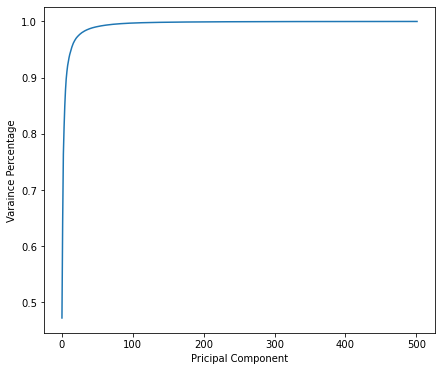

In [12]:
pca = PCA()
pc = pca.fit_transform(X)
plt.figure(figsize=(7,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Component')
plt.ylabel('Varaince Percentage')
plt.show()

In [13]:
l1 = []
for i in range(0,25):
    st = 'pc'+str(i)
    l1.append(st)


In [15]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(X)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data, columns = ['pc1','pc2'])

In [16]:
principal_Df

,pc1,pc2
0,25.647154,9.991542
1,25.744480,9.878093
2,25.661695,9.811347
3,25.764126,9.979938
4,25.675520,9.863466
...,...,...
41261,-22.879373,13.327705
41262,-22.908026,13.315272
41263,-22.858756,13.338018
41264,-22.705779,13.428202


In [17]:
from sklearn.cluster import KMeans

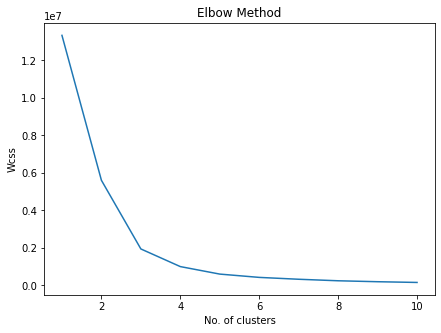

In [20]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',random_state=55)
    km.fit(principal_Df)
    wcss.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('Wcss')
plt.show()

    

In [35]:
## No. of clusters is 5 according to elbow method
km = KMeans(n_clusters=5,init='k-means++',random_state=0)
km.fit(principal_Df)

KMeans(n_clusters=5, random_state=0)

In [36]:
y_kmeans=km.fit_predict(principal_Df)

In [37]:
y_kmeans.shape

(41266,)

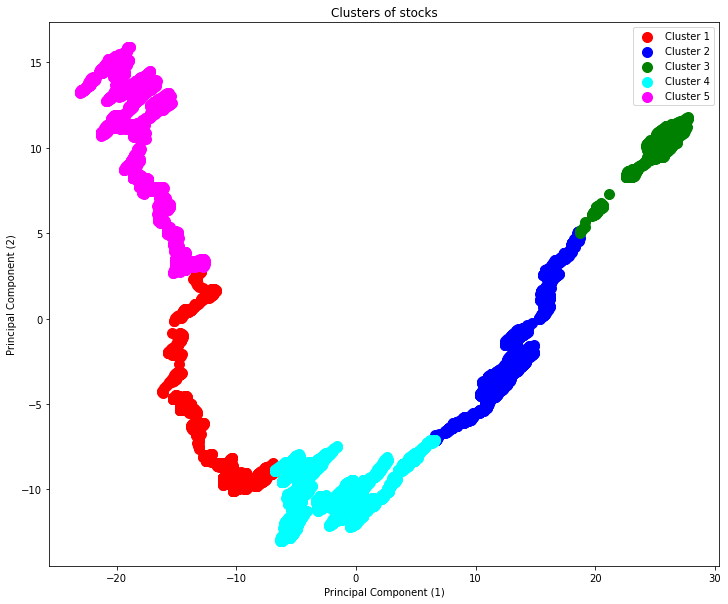

In [43]:
plt.figure(figsize=(12,10))
plt.scatter(principal_Df[y_kmeans == 0]['pc1'], principal_Df[y_kmeans == 0]['pc2'],s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(principal_Df[y_kmeans == 1]['pc1'], principal_Df[y_kmeans == 1]['pc2'],s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(principal_Df[y_kmeans == 2]['pc1'], principal_Df[y_kmeans == 2]['pc2'],s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(principal_Df[y_kmeans == 3]['pc1'], principal_Df[y_kmeans == 3]['pc2'],s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(principal_Df[y_kmeans == 4]['pc1'], principal_Df[y_kmeans == 4]['pc2'],s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()